In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Reading the data from the CSV.

In [2]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,...,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/19 17:56,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,...,IMPROPER BACKING,2,0.0,0.0,0.0,0.0,0.0,17,4,7
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/17 16:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,FAILING TO YIELD RIGHT-OF-WAY,2,0.0,0.0,0.0,0.0,0.0,16,6,6
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,7/10/20 10:25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,...,FAILING TO YIELD RIGHT-OF-WAY,3,0.0,0.0,0.0,0.0,0.0,10,6,7
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,7/11/20 1:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,1,7,7
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,7/8/20 14:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,14,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481618,276f2a5ce36d9aa08f7473daaf6b0061615475fc862f0d...,1/18/21 9:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,UNKNOWN,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,9,2,1
481619,71a084086041d7adc696d9fd71f3cb2d552b9ce93787ba...,1/19/21 21:23,25,NO CONTROLS,UNKNOWN,SNOW,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,SNOW OR SLUSH,...,NOT APPLICABLE,3,0.0,0.0,0.0,0.0,0.0,21,3,1
481620,28c5281550170efd701934c4cd5f8896b96d43c20c152d...,1/20/21 20:20,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,WET,...,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,20,4,1
481621,4983c1d0944603c5e93b599df3ad9c33b4863a6250691b...,1/20/21 17:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,DRY,...,FAILING TO YIELD RIGHT-OF-WAY,2,0.0,0.0,0.0,0.0,0.0,17,4,1


1. Cleaning the data

In [3]:
round(df.isnull().mean()*100,2) 


CRASH_RECORD_ID                   0.00
CRASH_DATE                        0.00
POSTED_SPEED_LIMIT                0.00
TRAFFIC_CONTROL_DEVICE            0.00
DEVICE_CONDITION                  0.00
WEATHER_CONDITION                 0.00
LIGHTING_CONDITION                0.00
FIRST_CRASH_TYPE                  0.00
TRAFFICWAY_TYPE                   0.00
ROADWAY_SURFACE_COND              0.00
ROAD_DEFECT                       0.00
CRASH_TYPE                        0.00
INTERSECTION_RELATED_I           77.44
NOT_RIGHT_OF_WAY                 95.30
HIT_AND_RUN_I                    70.63
DAMAGE                            0.00
DATE_POLICE_NOTIFIED              0.00
PRIM_CONTRIBUTORY_CAUSE           0.00
NUM_UNITS                         0.00
INJURIES_TOTAL                    0.20
INJURIES_FATAL                    0.20
INJURIES_INCAPACITATING           0.20
INJURIES_NON_INCAPACITATING       0.20
INJURIES_REPORTED_NOT_EVIDENT     0.20
CRASH_HOUR                        0.00
CRASH_DAY_OF_WEEK        

As per the data, the following fields missing data percentage: 
INTERSECTION_RELATED_I           77.44
NOT_RIGHT_OF_WAY                 95.30
HIT_AND_RUN_I                    70.63
INJURIES_TOTAL                    0.20
INJURIES_FATAL                    0.20
INJURIES_INCAPACITATING           0.20
INJURIES_NON_INCAPACITATING       0.20
INJURIES_REPORTED_NOT_EVIDENT     0.20

Filling the fields 
INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY,HIT_AND_RUN_I with NA
INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT with NA

In [4]:
df['INTERSECTION_RELATED_I'] = df['INTERSECTION_RELATED_I'].fillna('NA')
df['NOT_RIGHT_OF_WAY'] = df['NOT_RIGHT_OF_WAY'].fillna('NA')
df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].fillna('NA')

df['INJURIES_TOTAL'] = df['INJURIES_TOTAL'].fillna('NA')
df['INJURIES_FATAL'] = df['INJURIES_FATAL'].fillna('NA')
df['INJURIES_INCAPACITATING'] = df['INJURIES_INCAPACITATING'].fillna('NA')
df['INJURIES_NON_INCAPACITATING'] = df['INJURIES_NON_INCAPACITATING'].fillna('NA')
df['INJURIES_REPORTED_NOT_EVIDENT'] = df['INJURIES_REPORTED_NOT_EVIDENT'].fillna('NA')


2.Are there other attributes that you can break down into smaller attributes to gain more information from? 

Breaking the DATE_POLICE_NOTIFIED into different sections

In [5]:
df['POLICE_NOTIFIED_HOUR'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED']).dt.hour
df['POLICE_NOTIFIED_MONTH'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED']).dt.month
df['POLICE_NOTIFIED_DAYOFWEEK'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED']).dt.dayofweek

df


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,...,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,POLICE_NOTIFIED_HOUR,POLICE_NOTIFIED_MONTH,POLICE_NOTIFIED_DAYOFWEEK
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/19 17:56,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,...,0.0,0.0,0.0,0.0,17,4,7,18,7,2
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/17 16:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,0.0,0.0,0.0,0.0,16,6,6,16,6,4
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,7/10/20 10:25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,...,0.0,0.0,0.0,0.0,10,6,7,10,7,4
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,7/11/20 1:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,...,0.0,0.0,0.0,0.0,1,7,7,8,7,5
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,7/8/20 14:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,...,0.0,0.0,0.0,0.0,14,4,7,14,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481618,276f2a5ce36d9aa08f7473daaf6b0061615475fc862f0d...,1/18/21 9:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,UNKNOWN,...,0.0,0.0,0.0,0.0,9,2,1,20,1,1
481619,71a084086041d7adc696d9fd71f3cb2d552b9ce93787ba...,1/19/21 21:23,25,NO CONTROLS,UNKNOWN,SNOW,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,SNOW OR SLUSH,...,0.0,0.0,0.0,0.0,21,3,1,21,1,1
481620,28c5281550170efd701934c4cd5f8896b96d43c20c152d...,1/20/21 20:20,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,WET,...,0.0,0.0,0.0,0.0,20,4,1,20,1,2
481621,4983c1d0944603c5e93b599df3ad9c33b4863a6250691b...,1/20/21 17:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,DRY,...,0.0,0.0,0.0,0.0,17,4,1,18,1,2


------------------------------------------------------
3. Insights about the crashes and date/time

<AxesSubplot:xlabel='Day of week', ylabel='Number of Crashes'>

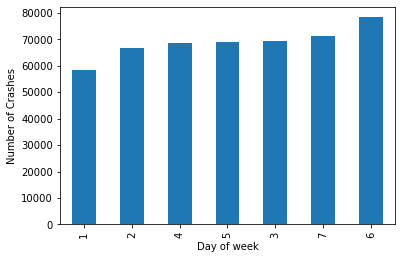

In [6]:
#3.1 On the bases of days of week
df["CRASH_DAY_OF_WEEK"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(xlabel='Day of week',ylabel='Number of Crashes')

3.1 Insights:
From the above graph, we can see that the number of crashes is high on the weekends and highest on the 6th day of the week which is a Saturday.

<AxesSubplot:xlabel='Lighting Condition', ylabel='Number of Crashes'>

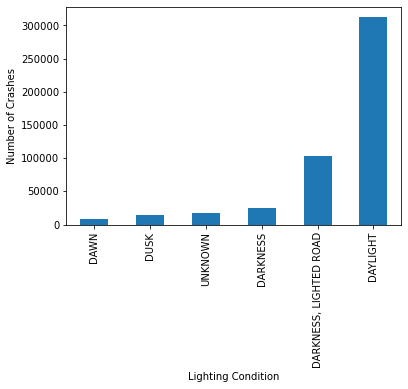

In [7]:
#3.2 On the basis of lighting conditions
df["LIGHTING_CONDITION"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(xlabel='Lighting Condition',ylabel='Number of Crashes')

3.2 Insights:
From the above graph, we can see that the number of crashes is highest during the dayight. This might be the case as traffic is highest during the daylight time.

<AxesSubplot:xlabel='Weather Condition', ylabel='Number of Crashes'>

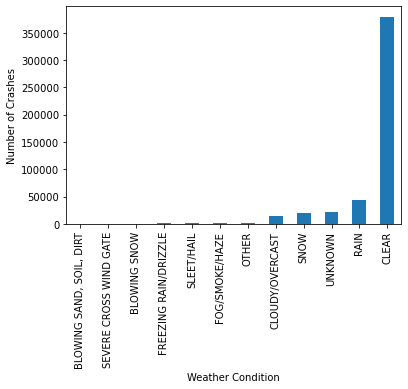

In [8]:
#3.3 On the basis of Weather Condition
df["WEATHER_CONDITION"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(xlabel='Weather Condition',ylabel='Number of Crashes')

3.3 Insights:
Most of the crashes happend during the clear weather(The weather is clear during most of the year therefore can lead have hgher number). The most important insight is the second most crashes happend during the rain.

<AxesSubplot:xlabel='Crash Hour', ylabel='Number of Crashes'>

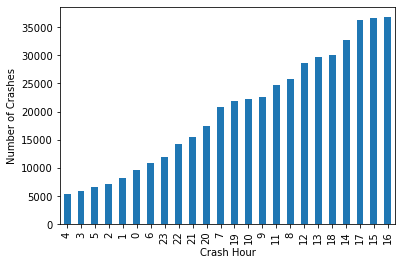

In [9]:
#3.4 On the basis of Crash_Hour
df["CRASH_HOUR"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(xlabel='Crash Hour',ylabel='Number of Crashes')

#3.4 Insights:
This graph shows most of the crashes occrured during 14-17 hour i.e. between 2p.m - 5p.m which is usually the rush hour in the city.

<AxesSubplot:xlabel='Crash Month', ylabel='Number of Crashes'>

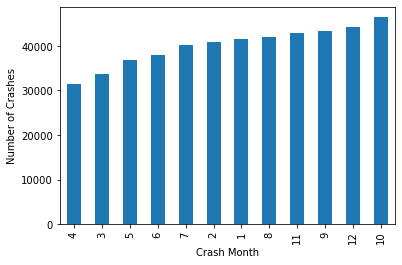

In [10]:
#3.5 On the basis of Crash_Hour
df["CRASH_MONTH"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(xlabel='Crash Month',ylabel='Number of Crashes')

#3.5 Insights:
This graph shows most of the crashes are distributed across the different months and therefore the months don't play a crucial factor while taking the number of crashes in account.

--------------------------------------------------------------------------------
4. Has number of deadly crashes increased recently? Look at the data over the years. Can you identify
any significant increase/decrease?

Adding CRASH_YEAR as an extra attribute to the data.
I have ignored the data where injuries fatal and is blank and 0.

I have performed a group by on the CRASH_YEAR and havind a sum of the count of crashes per year.

In [11]:
df['CRASH_YEAR'] = pd.to_datetime(df['CRASH_DATE']).dt.year
df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,POLICE_NOTIFIED_HOUR,POLICE_NOTIFIED_MONTH,POLICE_NOTIFIED_DAYOFWEEK,CRASH_YEAR
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/19 17:56,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,...,0.0,0.0,0.0,17,4,7,18,7,2,2019
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/17 16:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,0.0,0.0,0.0,16,6,6,16,6,4,2017
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,7/10/20 10:25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,...,0.0,0.0,0.0,10,6,7,10,7,4,2020
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,7/11/20 1:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,...,0.0,0.0,0.0,1,7,7,8,7,5,2020
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,7/8/20 14:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,...,0.0,0.0,0.0,14,4,7,14,7,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481618,276f2a5ce36d9aa08f7473daaf6b0061615475fc862f0d...,1/18/21 9:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,UNKNOWN,...,0.0,0.0,0.0,9,2,1,20,1,1,2021
481619,71a084086041d7adc696d9fd71f3cb2d552b9ce93787ba...,1/19/21 21:23,25,NO CONTROLS,UNKNOWN,SNOW,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,SNOW OR SLUSH,...,0.0,0.0,0.0,21,3,1,21,1,1,2021
481620,28c5281550170efd701934c4cd5f8896b96d43c20c152d...,1/20/21 20:20,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,WET,...,0.0,0.0,0.0,20,4,1,20,1,2,2021
481621,4983c1d0944603c5e93b599df3ad9c33b4863a6250691b...,1/20/21 17:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,DRY,...,0.0,0.0,0.0,17,4,1,18,1,2,2021


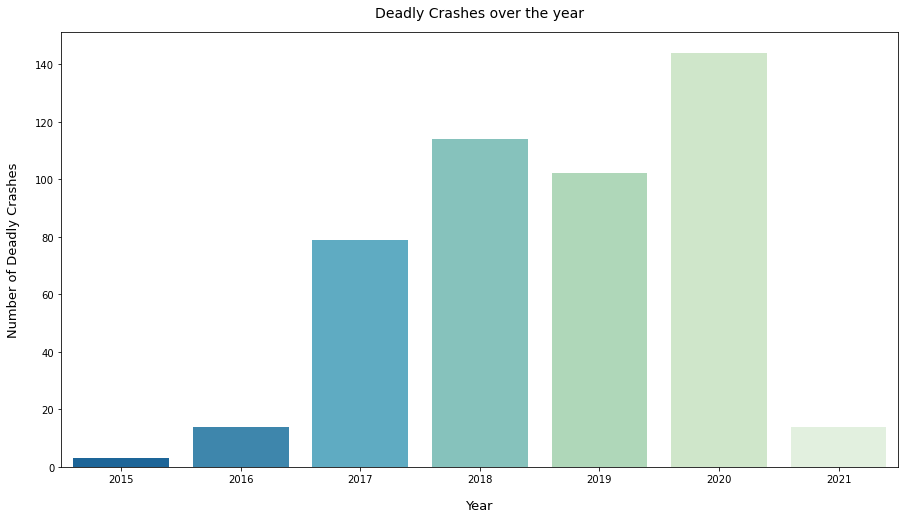

In [12]:

df_deadlycrash = df[df['INJURIES_FATAL'] != 'NA']
df_deadlycrash = df_deadlycrash[df_deadlycrash['INJURIES_FATAL'] != 0]
plt.figure(figsize=(15,8))
s = sns.barplot(data=df_deadlycrash.groupby('CRASH_YEAR')['CRASH_RECORD_ID'].nunique().reset_index(), x='CRASH_YEAR', y='CRASH_RECORD_ID', palette='GnBu_r', linewidth=0)
s.set_title('Deadly Crashes over the year', y=1.02, fontsize=14)
s.set_xlabel('Year', fontsize=13, labelpad=15)
s.set_ylabel('Number of Deadly Crashes', fontsize=13, labelpad=15)
plt.show()

Insights:
The number of deadly crashes have increased from year 2019 to year 2020.
There is a significant decrease in deadly crashes from the year 2020 to year 2021.

---------------------------------------------------------------
5. Investigate number and type of injuries based on the speed limit.

I have made a group of speed 0-10,10-20....
The group will have the total count of crashes in that range of speed and have plotted the graphs accordingly.

Text(0, 0.5, 'Total Injuries')

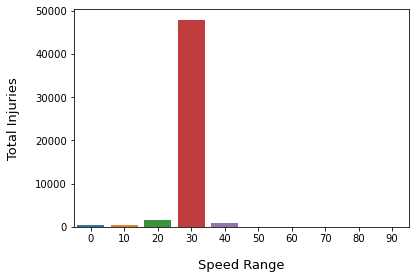

In [13]:
df_Injuries = df[df['INJURIES_TOTAL'] != 'NA']
pos_count = []
speed = [0,10,20,30,40,50,60,70,80,90]
for i in range (0,100,10):
    y = df_Injuries.loc[df_Injuries['POSTED_SPEED_LIMIT']==i]['INJURIES_TOTAL']
    count = 0
    for i in y:
        if(i!=0):
            count += 1
    pos_count.append(count)
s = sns.barplot(x=speed,y=pos_count)
s.set_xlabel('Speed Range', fontsize=13, labelpad=15)
s.set_ylabel('Total Injuries', fontsize=13, labelpad=15)


Insights: As per the above graph, we can observer most of the total injuries occured when the speed was between 30-40mph

Text(0, 0.5, 'Fatal Injuries')

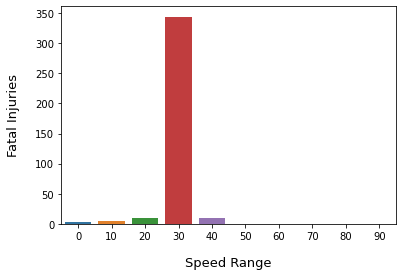

In [14]:
df_Injuries_fatal = df[df['INJURIES_FATAL'] != 'NA']
pos_count = []
speed = [0,10,20,30,40,50,60,70,80,90]
for i in range (0,100,10):
    y = df_Injuries_fatal.loc[df_Injuries_fatal['POSTED_SPEED_LIMIT']==i]['INJURIES_FATAL']
    count = 0
    for i in y:
        if(i!=0):
            count += 1
    pos_count.append(count)

s=sns.barplot(x=speed,y=pos_count)
s.set_xlabel('Speed Range', fontsize=13, labelpad=15)
s.set_ylabel('Fatal Injuries', fontsize=13, labelpad=15)

Insights: From the above graph, we can observe the Fatal Injuries were highest in the 30-40 bracket.

Text(0, 0.5, 'Incapacitating Injuries')

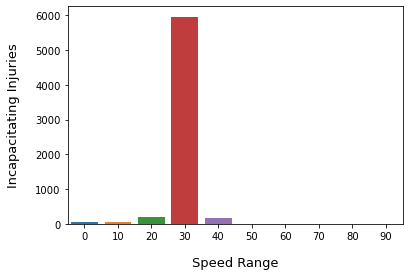

In [15]:
df_Injuries_Incap = df[df['INJURIES_INCAPACITATING'] != 'NA']
pos_count = []
speed = [0,10,20,30,40,50,60,70,80,90]
for i in range (0,100,10):
    y = df_Injuries_Incap.loc[df_Injuries_Incap['POSTED_SPEED_LIMIT']==i]['INJURIES_INCAPACITATING']
    count = 0
    for i in y:
        if(i!=0):
            count += 1
    pos_count.append(count)

s=sns.barplot(x=speed,y=pos_count)
s.set_xlabel('Speed Range', fontsize=13, labelpad=15)
s.set_ylabel('Incapacitating Injuries', fontsize=13, labelpad=15)

Insights for INJURIES_INCAPACITATING: From the above graph, we can observe the Incapacitating Injuries were highest in the 30-40 bracket.


Text(0, 0.5, 'Non-Incapacitating Injuries')

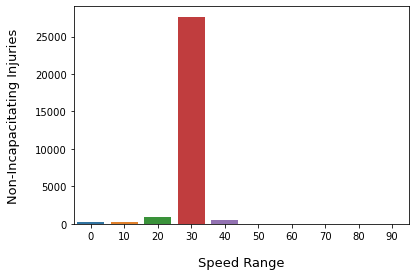

In [16]:
df_Injuries_NonIncap = df[df['INJURIES_NON_INCAPACITATING'] != 'NA']
pos_count = []
speed = [0,10,20,30,40,50,60,70,80,90]
for i in range (0,100,10):
    y = df_Injuries_NonIncap.loc[df_Injuries_NonIncap['POSTED_SPEED_LIMIT']==i]['INJURIES_NON_INCAPACITATING']
    count = 0
    for i in y:
        if(i!=0):
            count += 1
    pos_count.append(count)

s=sns.barplot(x=speed,y=pos_count)
s.set_xlabel('Speed Range', fontsize=13, labelpad=15)
s.set_ylabel('Non-Incapacitating Injuries', fontsize=13, labelpad=15)

Insights for INJURIES_NON_INCAPACITATING: From the above graph, we can observe the Non-Incapacitating Injuries were highest in the 30-40 bracket.

Final Insight : All the types of injuries were highest in the speed bracket of 30-40

-------------------------------------------------------------------------------
6. Is there a relationship between hit and run crashes and number of fatal injuries?

I have made a group by on the data on HIT_AND_RUN flag and the Number of fatal Injuries.

In [17]:
from sklearn import preprocessing


df_hit = df[df['HIT_AND_RUN_I'] != 'NA']
df_hit = df_hit[df_hit['INJURIES_FATAL'] != 'NA']
df_hit['COUNTER'] =1
df_hit = df_hit.groupby(['HIT_AND_RUN_I','INJURIES_FATAL'])['COUNTER'].sum()
df_hit



HIT_AND_RUN_I  INJURIES_FATAL
N              0.0                 6082
               1.0                    7
Y              0.0               134903
               1.0                   71
               2.0                    4
               3.0                    1
Name: COUNTER, dtype: int64

From the above table, we can observe the values where crashes are 0 for Y and N Hit&Run flag is way higher. This will result in a not a good visual representation. So I am ignoring the case where fatalities are 0 for both Y and N flag.
The new plot will only show the fatalities with the hit and run flag.

C:\Users\Dhwanit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Crashes')

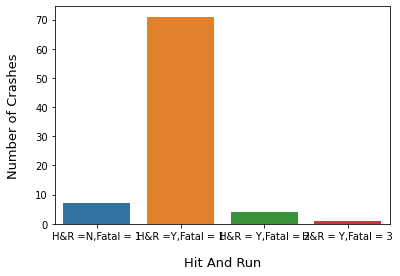

In [18]:
new_df = []
for i, index  in enumerate(df_hit):
    if (i != 0 and i !=2):
        new_df.append(index)
list1 = ['H&R =N,Fatal = 1','H&R =Y,Fatal = 1','H&R = Y,Fatal = 2','H&R = Y,Fatal = 3']

s=sns.barplot(list1,new_df)
s.set_xlabel('Hit And Run', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)




INSIGHTS: 
Here, we can see if the Hit and Run is 'Y'. Then the number of fatal where only 1 person is fatally injured is very high compared to other data where the fatalities are nearly same, regardless of a hit and run case.

-----------------------------------------------------------
7. Do intersection-related crashes result in more fatal injuries?


In [19]:
df_INTERSECTION = df[df['INTERSECTION_RELATED_I'] != 'NA']
df_INTERSECTION = df_INTERSECTION[df_INTERSECTION['INJURIES_FATAL'] != 'NA']
#df_INTERSECTION = df_INTERSECTION[df_INTERSECTION['INJURIES_FATAL'] != 0]


df_INTERSECTION['COUNTER'] =1
df_INTERSECTION = df_INTERSECTION.groupby(['INTERSECTION_RELATED_I','INJURIES_FATAL'])['COUNTER'].sum().unstack('INTERSECTION_RELATED_I')
df_INTERSECTION.fillna(0,inplace=True)
df_INTERSECTION


INTERSECTION_RELATED_I,N,Y
INJURIES_FATAL,,
0.0,5108.0,103364.0
1.0,10.0,133.0
2.0,0.0,14.0
3.0,0.0,2.0


From the above table, we can observe the values for 0 injuries is very high. Therefore it will lead to incorrect visualization due to such different min,max of the values. The graph is plotted below:

<AxesSubplot:xlabel='Number of Fatal Injuries', ylabel='Number of crashes'>

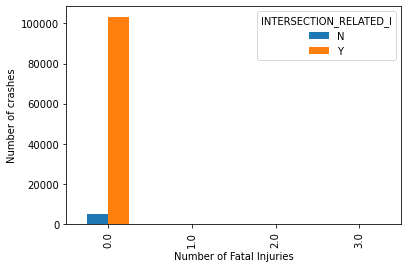

In [20]:
df_INTERSECTION.plot.bar(xlabel = 'Number of Fatal Injuries',ylabel = 'Number of crashes')


Insights: From the table and the graph, we can observe that the fatalities at intersection are very low compared to non-fatal accidents. 

Now to compare a graph, taking only accidents where there were actual fatal injuries:

In [21]:
df_INTERSECTION_FATAL = df[df['INTERSECTION_RELATED_I'] != 'NA']
df_INTERSECTION_FATAL = df_INTERSECTION_FATAL[df_INTERSECTION_FATAL['INJURIES_FATAL'] != 'NA']
df_INTERSECTION_FATAL = df_INTERSECTION_FATAL[df_INTERSECTION_FATAL['INJURIES_FATAL'] != 0]


df_INTERSECTION_FATAL['COUNTER'] =1
df_INTERSECTION_FATAL = df_INTERSECTION_FATAL.groupby(['INTERSECTION_RELATED_I','INJURIES_FATAL'])['COUNTER'].sum().unstack('INTERSECTION_RELATED_I')
df_INTERSECTION_FATAL.fillna(0,inplace=True)
df_INTERSECTION_FATAL

INTERSECTION_RELATED_I,N,Y
INJURIES_FATAL,,
1.0,10.0,133.0
2.0,0.0,14.0
3.0,0.0,2.0


<AxesSubplot:xlabel='Number of fatal injury', ylabel='Count'>

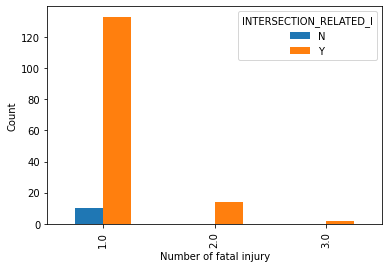

In [22]:
df_INTERSECTION_FATAL.plot.bar(xlabel = 'Number of fatal injury', ylabel = 'Count')

In this graph, we can see that the crashes with more than 1 fatality only occured on the intersections.

---------------------------------------------------------------------
8. Personal Insights

8.1 On the basis of Traffic Control Device

<AxesSubplot:ylabel='Number of Crashes'>

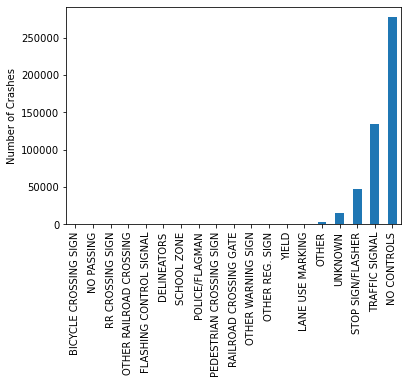

In [23]:
df["TRAFFIC_CONTROL_DEVICE"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(ylabel = 'Number of Crashes')

Insights : We can observe that the most of the accidents occured when there was no controls on the traffic. 
The second highest occured on the traffic signals.

8.2 When the Primary contribution cause is weather:

<AxesSubplot:ylabel='Number of Crashes'>

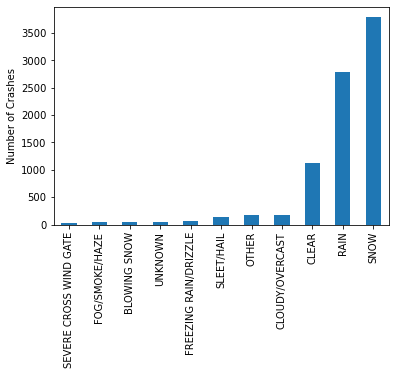

In [24]:
df_WEATHER = df[df['PRIM_CONTRIBUTORY_CAUSE'] == 'WEATHER']
df_WEATHER["WEATHER_CONDITION"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(ylabel = 'Number of Crashes')


Insight : Most of the accident occured when there was snowy weather.
The second major cause was rain.

8.3 Accident caused when Traffic Control Device = Traffic Signal in different lighting conditions and time of hour

<AxesSubplot:ylabel='Number of Crashes'>

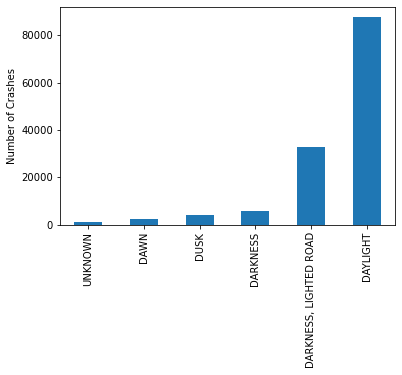

In [25]:
df_TDC = df[df['TRAFFIC_CONTROL_DEVICE'] == 'TRAFFIC SIGNAL']

df_TDC["LIGHTING_CONDITION"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(ylabel = 'Number of Crashes')


<AxesSubplot:xlabel='Crash Hour', ylabel='Number of Crashes'>

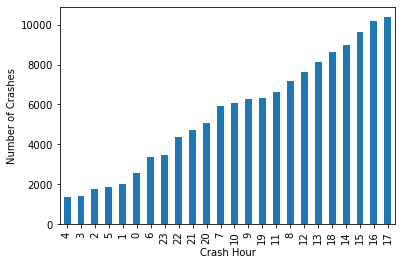

In [26]:
df_TDC["CRASH_HOUR"].value_counts(normalize=False).sort_values(ascending=True).plot.bar(ylabel = 'Number of Crashes',xlabel = 'Crash Hour')


Insights : Most accidents occured in daylight which is normal due to heavy traffic on that time.
The second most highest occured when there was darkness and the road was lighted when compared to simple darkness. 
This can mean lighted roads can cause issues while observing the traffic lights while driving

THe second insight show the max accidents occured during 3-5 P.M. This is usually the rush hour therefore time and traffic lights usually have no connection in crashes. 